# Imports

In [1]:
import librosa
from librosa.display import waveshow, specshow
from librosa.feature import melspectrogram, chroma_stft
import matplotlib.pyplot as plt
import os
import re

# Process and compare some files

In [17]:
import subprocess
import os
import sys

class MusicFile:
    
    def __init__(self, filename: str, video_file = False) -> None:
        self.filename = filename
        if video_file:
            new_filename = f"{os.path.splitext(video_file)[0]}.mp3"
            subprocess.call(["ffmpeg", "-y", "-i", filename, new_filename], 
                        stdout=subprocess.DEVNULL,
                        stderr=subprocess.STDOUT)
            self.filename = new_filename
        load_tuple = librosa.load(self.filename)
        print(load_tuple)
        self.y, self.sr = load_tuple
        self.mel_spectrogram = melspectrogram(y=self.y, sr=self.sr)
        self.chromagram  = chroma_stft(y=self.y, sr= self.sr)
    
    def show(self):
        self.fig, self.ax = plt.subplots(nrows=3, ncols=1, sharex=True)
        self.fig.suptitle(self.filename.split('\\')[-1])
        self.wave_image = waveshow(y=self.y, sr=self.sr, ax=self.ax[0])
        self.ax[0].set(title='Envelope view, mono')
        self.ax[0].label_outer()
        
        self.mel_image = specshow(self.mel_spectrogram, x_axis='s', y_axis='mel', ax=self.ax[1])
        self.ax[1].set(title='mel-scaled spectrogram')
        self.ax[1].label_outer()
        
        self.chroma_image = specshow(self.chromagram, x_axis='s', y_axis='chroma', ax=self.ax[2])
        self.ax[2].set(title='chromagram')
        self.ax[2].label_outer()
        

/var/folders/_1/7wqzqjts5299h6bw4202wjf00000gp/T/ipykernel_14873/4017308316.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  load_tuple = librosa.load(self.filename)
/Users/conor.fehilly/Documents/repos/MusicProcessing/.venv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/conor.fehilly/Documents/repos/MusicProcessing/.venv/lib/python3.12/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050)


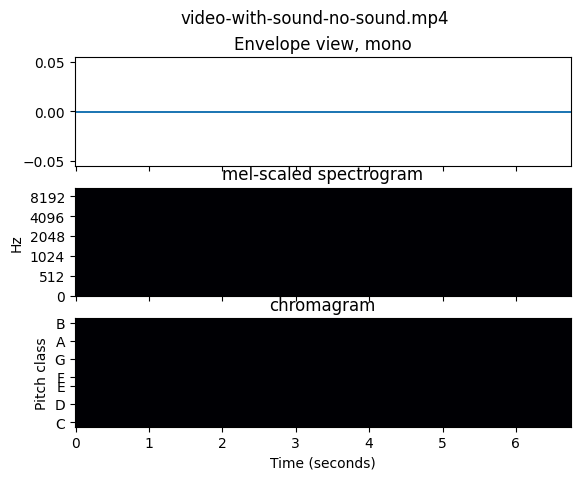

In [28]:
no_sound = MusicFile("video-with-sound-no-sound.mp4")
no_sound.show()

In [22]:
no_sound.y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [29]:
any(no_sound.y)

False

/var/folders/_1/7wqzqjts5299h6bw4202wjf00000gp/T/ipykernel_14873/4017308316.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  load_tuple = librosa.load(self.filename)
/Users/conor.fehilly/Documents/repos/MusicProcessing/.venv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(array([ 2.8343147e-01,  4.6152738e-01,  4.4583711e-01, ...,
        2.4400670e-10,  9.2593039e-10, -9.1983410e-10], dtype=float32), 22050)


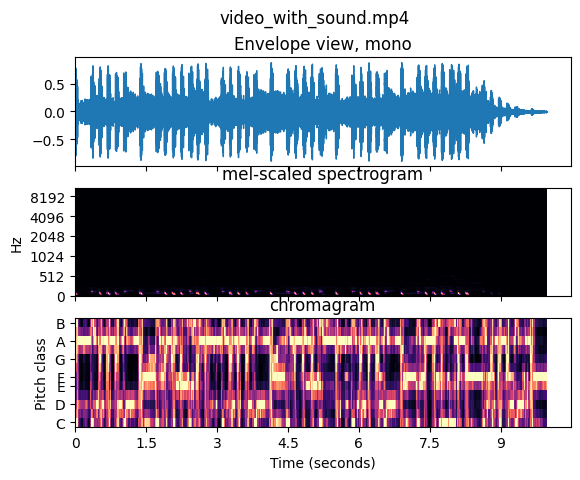

In [33]:
sound = MusicFile("video_with_sound.mp4")
sound.show()


In [34]:
any(sound.y)

True